In [ ]:
# 1. Evaluate ARIMA Model

# This approach involves the following steps:

# 1. Split the dataset into training and test sets.
# 2. Walk the time steps in the test dataset.
#   2.1. Train an ARIMA model.
#   2.2. Make a one-step prediction.
#   2.3. Store prediction; get and store actual observation.
# 3. Calculate error score for predictions compared to expected values

# We can implement this in Python as a new standalone function called evaluate_arima_model() that takes a time series dataset as input as well as a tuple with the p, d, and q parameters for the model to be evaluated.

# Import libs
# The dataset is split in two: 66% for the initial training dataset and the remaining 34% for the test dataset.


In [1]:
# 2. Iterate ARIMA Parameters

# it is recommended that warnings be ignored for this code to avoid a lot of noise from running the procedure. This can be done as follows:

In [4]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")


# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
    # print(x)
	return datetime.strptime(x, "%d/%m/%Y")
series = read_csv('./input/McDonald_Test.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

series.index = series.index.to_period('M')

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.772
ARIMA(0, 0, 1) RMSE=0.577
ARIMA(0, 0, 2) RMSE=0.656
ARIMA(0, 1, 0) RMSE=0.508
ARIMA(0, 1, 1) RMSE=0.595
ARIMA(0, 1, 2) RMSE=0.481
ARIMA(0, 2, 0) RMSE=0.792
ARIMA(0, 2, 1) RMSE=0.528
ARIMA(0, 2, 2) RMSE=0.566
ARIMA(1, 0, 0) RMSE=0.498
ARIMA(1, 0, 1) RMSE=0.541
ARIMA(1, 0, 2) RMSE=0.476
ARIMA(1, 1, 0) RMSE=0.521
ARIMA(1, 1, 1) RMSE=0.550
ARIMA(1, 1, 2) RMSE=0.486
ARIMA(1, 2, 0) RMSE=0.734
ARIMA(1, 2, 1) RMSE=0.537
ARIMA(1, 2, 2) RMSE=0.548
ARIMA(2, 0, 0) RMSE=0.510
ARIMA(2, 0, 1) RMSE=0.525
ARIMA(2, 0, 2) RMSE=0.481
ARIMA(2, 1, 0) RMSE=0.470
ARIMA(2, 1, 1) RMSE=0.468
ARIMA(2, 1, 2) RMSE=0.487
ARIMA(2, 2, 0) RMSE=0.648
ARIMA(2, 2, 1) RMSE=0.468
ARIMA(2, 2, 2) RMSE=0.453
ARIMA(4, 0, 0) RMSE=0.462
ARIMA(4, 0, 1) RMSE=0.487
ARIMA(4, 0, 2) RMSE=0.487
ARIMA(4, 1, 0) RMSE=0.465
ARIMA(4, 1, 1) RMSE=0.519
ARIMA(4, 1, 2) RMSE=0.503
ARIMA(4, 2, 0) RMSE=0.519
ARIMA(4, 2, 1) RMSE=0.467
ARIMA(4, 2, 2) RMSE=0.518
ARIMA(6, 0, 0) RMSE=0.483
ARIMA(6, 0, 1) RMSE=0.495
ARIMA(6, 0, 

### ARIMA here

In [5]:
# Best ARIMA(2, 2, 2) RMSE=0.453
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


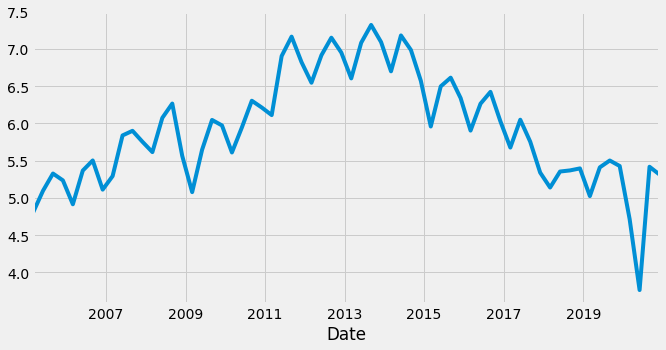

In [8]:
series.plot(figsize=(10, 5))
plt.show()

In [9]:
# Step 3 — The ARIMA Time Series Model
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
 



Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [10]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:406.3080421001727
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:289.7472907797377
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:135.02395905663153
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:114.11061557106443
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:138.79434938628694
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:130.73703213950034
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:111.51844880697523
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:111.77238711355882
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:324.63950395872
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:224.39320090543512
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:89.0458797206633
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:78.20086815038472
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:94.57505043466742
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:89.67125713763656
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:79.45310606827391
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:78.5014442592596
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:72.40025975380222
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:58.155230702190046
ARIMA(

In [11]:
mod = sm.tsa.statespace.SARIMAX(series,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1358      0.616      0.221      0.825      -1.071       1.342
ma.L1         -0.4388      0.753     -0.583      0.560      -1.914       1.037
ar.S.L12      -0.4054      0.627     -0.647      0.518      -1.634       0.824
ma.S.L12      -9.2595     52.348     -0.177      0.860    -111.860      93.342
sigma2         0.0020      0.022      0.087      0.930      -0.042       0.046


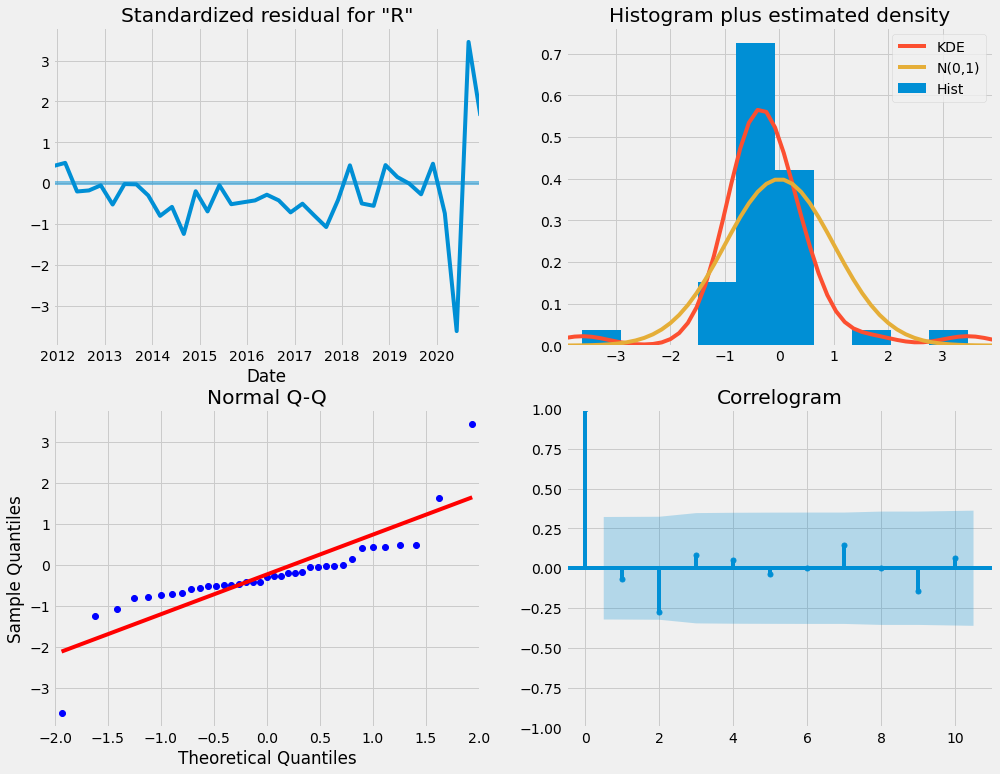

In [12]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [24]:
pred = results.get_prediction(start=pd.to_datetime('2005-03'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower Revenue($),upper Revenue($)
Date,,
2005-03,-3394.757202,3394.757202
2005-06,-2775.291819,2785.332604
2005-09,-2773.096760,2783.358127
2005-12,-2772.872833,2783.563032
2006-03,-2772.987941,2783.447838
...,...,...
2019-12,4.429835,6.035236
2020-03,4.213144,5.818545
2020-06,4.439953,6.045352


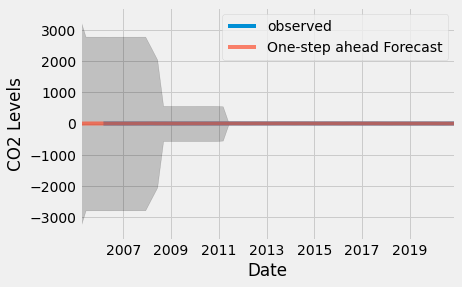

In [22]:
ax = series['2006':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [23]:
y_forecasted = pred.predicted_mean
y_truth = series['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

NameError: name 'y' is not defined